In [1]:
%load_ext autoreload 
%autoreload 2

%matplotlib widget

import numpy as np 
import matplotlib.pyplot as plt
from scipy import constants

from pybkit.amo.atom import Yb171, EnergyLevel, EnergyTransition

In [15]:
yb = Yb171(B_field=5e-4)

print(yb.get_fine_level('6s^{2} 1S0').calculate_zeeman_shift(F=0.5, mF=0.5, B_field=5e-4))
print(yb.get_transition('6s6p 3P2 F=1.5 mF=0.5', '6s7s 3S1 F=0.5 mF=0.5').frequency_Hz / 1e12)
print(yb.get_transition('6s6p 3P2', '6s6d 3D2').wavelength_m*1e9)
print(yb.get_reduced_matrix_element('6s6p 3P2', '6s6d 3D2', include_source=True))
print(yb._reduced_matrix_elements)
print(yb.calculate_polarizability('6s^{2} 1S0 F=0.5 mF=0.5', wavelength=486, vector_coeff=0))

1874.776804699683
389.2477438191398
496.8404585514189
{'value': 0.72, 'source': 'Estimation from 3D2 lifetime + branching ratio'}
{'6s^{2} 1S0': {'6s6p 3P1': {'value': 0.55, 'source': 'https://arxiv.org/pdf/physics/9903004'}, '6s7p 3P1': {'value': 0.08, 'source': 'polarizability.py from Bichen'}, '6s8p 3P1': {'value': 0.014, 'source': 'polarizability.py from Bichen'}, '6s6p 1P1': {'value': 4.13, 'source': 'https://arxiv.org/pdf/physics/9903004'}, '6s7p 1P1': {'value': 0.67, 'source': 'polarizability.py from Bichen'}, '6s8p 1P1': {'value': 0.21, 'source': 'polarizability.py from Bichen'}, '4f^{13}5d_{5/2}6s^{2} J=1': {'value': 2.04, 'source': 'polarizability.py from Bichen'}, '4f^{13}5d^{2}6s J=1': {'value': 0.2, 'source': 'polarizability.py from Bichen'}}, '6s6p 3P1': {'6s^{2} 1S0': {'value': 0.55, 'source': 'https://arxiv.org/pdf/physics/9903004'}, '5d6s 3D1': {'value': 2.51, 'source': 'https://journals.aps.org/pra/pdf/10.1103/PhysRevA.89.012711'}, '5d6s 3D2': {'value': 4.35, 'source'

In [16]:
transition = EnergyTransition(
    yb.get_hyperfine_level('6s7s 3S1 F=0.5 mF=0.5'), 
    # yb.get_hyperfine_level('6s6p 3P0 F=0.5 mF=-0.5'), 
    yb.get_hyperfine_level('6s7s 3S1 F=1.5 mF=0.5'), 
    detuning_Hz=0)
transition.frequency_Hz / 1e9

10.210076949432832

In [17]:
transition = EnergyTransition(
    yb.get_hyperfine_level('6s6p 3P2 F=1.5 mF=0.5'), 
    # yb.get_hyperfine_level('6s6p 3P0 F=0.5 mF=-0.5'), 
    yb.get_hyperfine_level('6s6p 3P2 F=2.5 mF=0.5'), 
    detuning_Hz=0)
transition.frequency_Hz / 1e9

6.690246961368797

In [18]:
transition = EnergyTransition(
    yb.get_hyperfine_level('6s6p 3P0 F=0.5 mF=0.5'), 
    # yb.get_hyperfine_level('6s6p 3P0 F=0.5 mF=-0.5'), 
    yb.get_hyperfine_level('6s6p 3P2 F=2.5 mF=-2.5'), 
    detuning_Hz=0)
transition.frequency_Hz / 1e12

72.60921414313417

In [19]:
((1/0.75)/(8.8))**2

0.022956841138659312

In [20]:
transition = EnergyTransition(
    yb.get_hyperfine_level('6s6p 3P2 F=2.5 mF=0.5'), 
    yb.get_hyperfine_level('6s6p 3P2 F=2.5 mF=-0.5'), 
    detuning_Hz=0)
transition.frequency_Hz / 1e6


-8.398303191204183

In [21]:
transition = EnergyTransition(yb.get_hyperfine_level('6s6p 3P2 F=1.5 mF=1.5'), yb.get_hyperfine_level('6s6p 3P2 F=2.5 mF=1.5'), detuning_Hz=0)
df_3P2 = transition.frequency_Hz / 1e6
print(df_3P2)

transition = EnergyTransition(yb.get_hyperfine_level('6s6d 3D2 F=1.5 mF=1.5'), yb.get_hyperfine_level('6s6d 3D2 F=2.5 mF=1.5'), detuning_Hz=0)
df_3D2 = transition.frequency_Hz / 1e6
print(df_3D2)

print(df_3P2 - df_3D2)

6686.049684537684
6582.479691166628
103.56999337105572


## Level structure

In [22]:
# yb.get_transition_energy('6s6p 3P0', '6s6p 3P1')
yb.get_nearby_transitions(wavelength=4.968404653962382e-7, max_detuning=20e9, level='6s6p 3P2 F=1.5 mF=0.5', hyperfine=True)
yb.get_nearby_transitions(wavelength=1540e-9, max_detuning=1e12, hyperfine=False)

[EnergyTransition(level1='6s6p 3P1', level2='5d6s 3D1', detuning_Hz=102934370599.1875),
 EnergyTransition(level1='4f^{13}6s^{2}6p_{1/2} J=3', level2='6s7p 3P2', detuning_Hz=210041730325.4375),
 EnergyTransition(level1='4f^{13}5d^{2}6s J=1', level2='imaginary_level_3P0 J=1', detuning_Hz=837492859861.0625),
 EnergyTransition(level1='6s7p 1P1', level2='4f^{13}5d6s6p_{3/2} J=6(?)', detuning_Hz=915353176639.1875)]

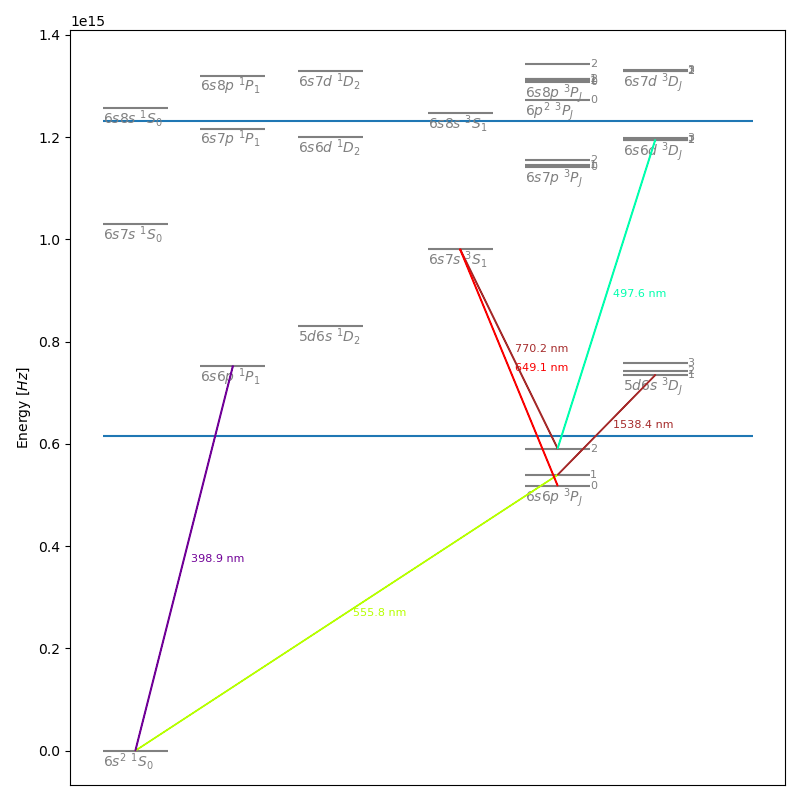

In [23]:
transitions = [
    EnergyTransition(yb.get_fine_level('6s^{2} 1S0'), yb.get_fine_level('6s6p 3P1'), detuning_Hz=0), # initialization
    EnergyTransition(yb.get_fine_level('6s^{2} 1S0'), yb.get_fine_level('6s6p 1P1'), detuning_Hz=0), # readout 
    EnergyTransition(yb.get_fine_level('6s7s 3S1'), yb.get_fine_level('6s6p 3P2'), detuning_Hz=0),
    EnergyTransition(yb.get_fine_level('6s6p 3P0'), yb.get_fine_level('6s7s 3S1'), detuning_Hz=0),
    EnergyTransition(yb.get_fine_level('6s6p 3P2'), yb.get_fine_level('6s6d 3D1'), detuning_Hz=0), # local addressing
    yb.get_nearby_transitions(wavelength=1540e-9, max_detuning=1e12, hyperfine=False)[0]
]

fig, ax = yb.plot_fine_structure(transitions=transitions, term_symbols_only=True, unit='Hz')
ax.hlines(616e12, xmin=0, xmax=1)
ax.hlines(2*616e12, xmin=0, xmax=1)

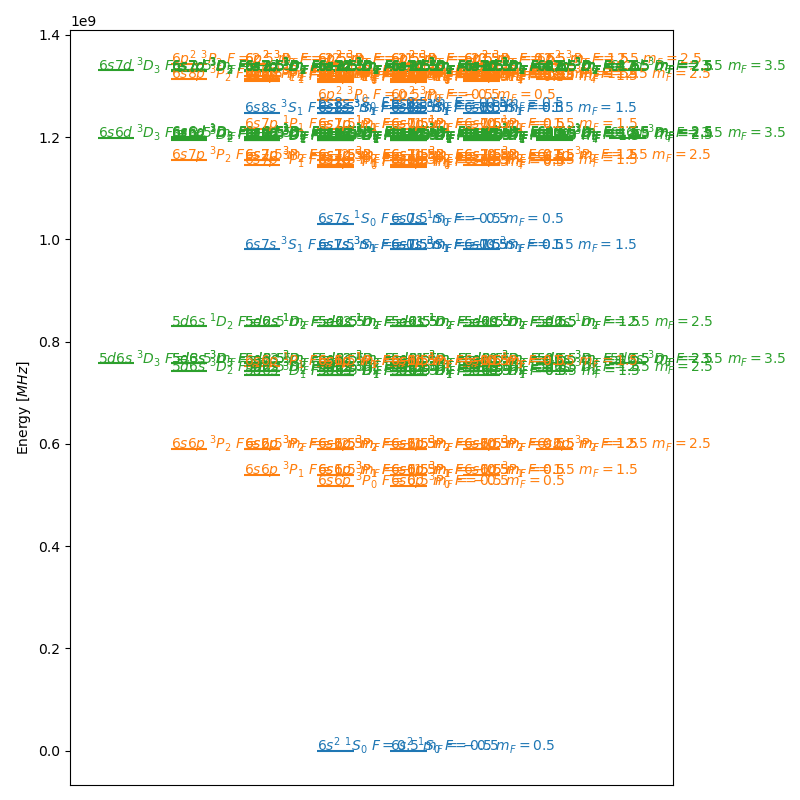

In [24]:
transitions = []
# transitions = [
#     EnergyTransition(yb.get_hyperfine_level('6s^{2} 1S0 F=0.5 mF=-0.5'), yb.get_hyperfine_level('6s6p 3P1 F=1.5 mF=0.5'), detuning_Hz=0),
#     EnergyTransition(yb.get_hyperfine_level('6s^{2} 1S0 F=0.5 mF=0.5'), yb.get_hyperfine_level('6s6p 3P1 F=1.5 mF=1.5'), detuning_Hz=0),
#     EnergyTransition(yb.get_hyperfine_level('6s6p 3P0 F=0.5 mF=-0.5'), yb.get_hyperfine_level('6s7s 3S1 F=0.5 mF=0.5'), detuning_Hz=0),
#     EnergyTransition(yb.get_hyperfine_level('6s6p 3P1 F=1.5 mF=1.5'), yb.get_hyperfine_level('5d6s 3D1 F=1.5 mF=1.5'), detuning_Hz=0),
# ]
# for hfl1 in yb.get_fine_level('6s6p 3P2').get_hyperfine_levels(B_field=5e-4):
#     for hfl2 in yb.get_fine_level('6s7s 3S1').get_hyperfine_levels(B_field=5e-4):
#         mF1 = hfl1.mF
#         mF2 = hfl2.mF
#         if mF2 in [mF1-1, mF1, mF1+1]:
#             transitions.append(EnergyTransition(hfl1, hfl2))

fig, ax = yb.plot_hyperfine_structure(transitions=transitions, term_symbols_only=True, label=True, unit='MHz')
# ax.set_ylim(-10, 1100)

## Magic wavelengths

In [25]:
wls = np.linspace(400, 1600, 1000) * 1e-9

# conversion from a.u. to SI
a0 = constants.physical_constants['Bohr radius'][0]
pol_atomic_SI = 4 * np.pi * constants.epsilon_0 * a0**3
factor = -1 / (2 * constants.epsilon_0 * constants.c) * pol_atomic_SI / constants.Planck
factor *= (1e2)**2 # convert from 1/m^2 to 1/cm^2 

pol_1S0 = factor * yb.calculate_polarizability('6s^{2} 1S0 F=0.5 mF=0.5', wavelength=wls, vector_coeff=0)
pol_3P0 = factor * yb.calculate_polarizability('6s6p 3P0 F=0.5 mF=0.5', wavelength=wls, vector_coeff=0)
pol_3P1 = factor * yb.calculate_polarizability('6s6p 3P1 F=1.5 mF=0.5', wavelength=wls, vector_coeff=0)
pol_3P2 = factor * yb.calculate_polarizability('6s6p 3P2 F=2.5 mF=0.5', wavelength=wls, vector_coeff=0)
# pol_1P1 = factor * yb.calculate_polarizability('6s6p 1P1 F=1.5 mF=0.5', wavelength=wls, vector_coeff=0)

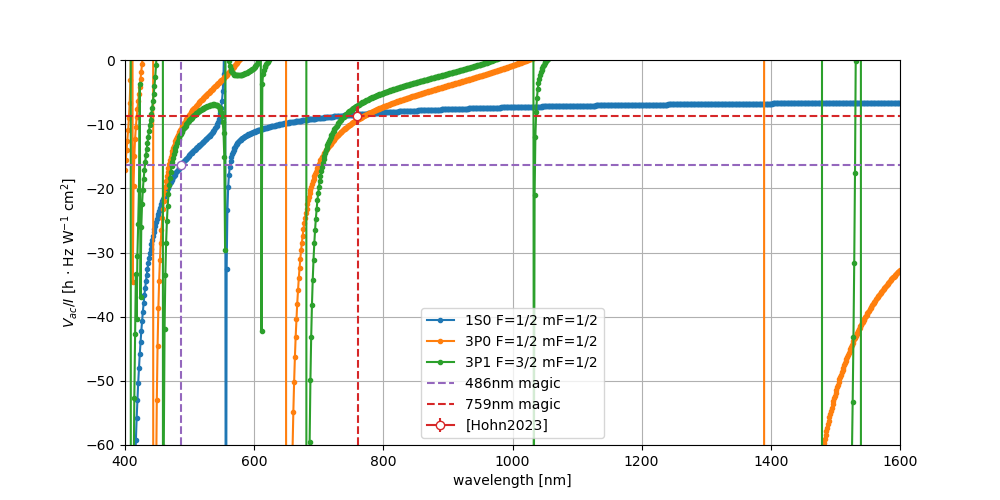

In [26]:
plt.figure(figsize=(10,5))

plt.plot(wls*1e9, pol_1S0, 'o-', ms=3, alpha=1, label='1S0 F=1/2 mF=1/2')
plt.plot(wls*1e9, pol_3P0, 'o-', ms=3, alpha=1, label='3P0 F=1/2 mF=1/2')
plt.plot(wls*1e9, pol_3P1, 'o-', ms=3, alpha=1, label='3P1 F=3/2 mF=1/2')
# plt.plot(wls*1e9, -pol_3P2, 'o', ms=3, alpha=1, label='3P2')
# plt.plot(wls*1e9, pol_1P1, 'o', ms=3, alpha=1, label='1P1')

plt.errorbar(x=486.78, y=-16.3, marker='o', mfc='w', color='C4')
plt.axvline(x=486.78,ls='--',color='C4')
plt.axhline(y=-16.3,ls='--',color='C4', label='486nm magic')


plt.axvline(x=760,ls='--',color='C3')
plt.axhline(y=-8.8,ls='--',color='C3', label='759nm magic')
plt.errorbar([759.3],[-8.8],[1.4],color='C3',marker='o',mfc='w',label='[Hohn2023]')

plt.ylabel('$V_{ac}/I$ [h $\cdot$ Hz W$^{-1}$ cm$^2$]')
# plt.ylim(-40,20)
# plt.ylim(-500,500)
plt.ylim(-60, 0)
plt.xlim(400, 1600)

plt.xlabel('wavelength [nm]')
plt.grid()
plt.legend()

## Scattering rates

In [27]:
wls = np.linspace(400, 1600, 1000) * 1e-9

# convert from a.u. to SI
a0 = constants.physical_constants['Bohr radius'][0]
pol_atomic_SI = 4 * np.pi * constants.epsilon_0 * a0**3
factor = (1/(constants.Planck/2/np.pi)/constants.epsilon_0/constants.c*pol_atomic_SI*10000)

scatter_1S0 = factor * yb.calculate_scattering_rate('6s^{2} 1S0 F=0.5 mF=0.5', wavelength=wls, vector_coeff=0)
scatter_3P0 = factor * yb.calculate_scattering_rate('6s6p 3P0 F=0.5 mF=0.5', wavelength=wls, vector_coeff=0)
scatter_3P1 = factor * yb.calculate_scattering_rate('6s6p 3P1 F=1.5 mF=0.5', wavelength=wls, vector_coeff=0)

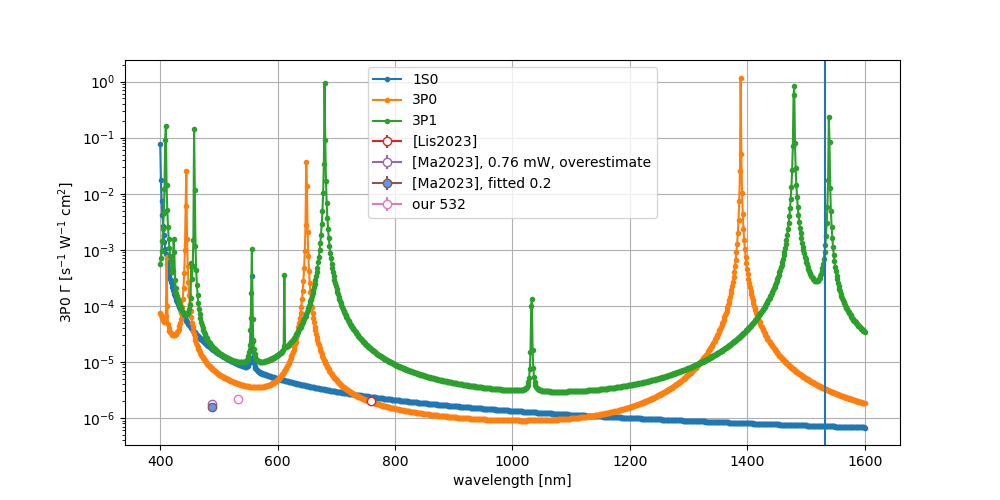

In [28]:
plt.figure(figsize=(10,5))

plt.plot(wls*1e9, scatter_1S0, ls='-', marker='.', alpha=1, label='1S0')
plt.plot(wls*1e9, scatter_3P0, ls='-', marker='.', alpha=1, label='3P0')
plt.plot(wls*1e9, scatter_3P1, ls='-', marker='.', alpha=1, label='3P1')
plt.errorbar([759.3],[2/(8.7e6/8.8)],[0.4/(8.7e6/8.8)], marker='o',mfc='w',label='[Lis2023]')
plt.errorbar([488],[1/2.9/(0.76e-3/np.pi/(0.5e-6*100)**2*2)],[0], marker='o',mfc='w',label='[Ma2023], 0.76 mW, overestimate')
plt.errorbar([488],[200/(1/(np.pi*(0.5e-6*1e2)**2))],[0], marker='o',mfc='cornflowerblue',label='[Ma2023], fitted 0.2')
plt.errorbar([532],[280/(1/(np.pi*(0.5e-6*1e2)**2))],[0], marker='o',mfc='w',label='our 532')
plt.yscale('log')
plt.ylabel('3P0 $\Gamma$ [s$^{-1}$ W$^{-1}$ cm$^2$]')
plt.xlabel('wavelength [nm]')

ymin, ymax = plt.ylim()
plt.vlines(1532, ymin, ymax)

plt.grid()
plt.legend()